In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data Extraction

In [2]:
path = 'C:\\IML-Assignment1\\1_Data\\1_Data\\group2\\classification\\linearlySeparabel\\class1_train.txt'

In [72]:
df = pd.DataFrame(columns=['col1','col2','className'])
df_test = pd.DataFrame(columns=['col1','col2','className'])

In [73]:
#merge all the training data related with the linearly separable into one

for i in range(1,5):
    with open('C:\\IML-Assignment1\\1_Data\\1_Data\\group2\\classification\\linearlySeparable\\class'+ str(i) + '_train.txt') as file:
        data = file.readlines()
        for line in data:
            row = line.split()
            row.append(i)
            df.loc[len(df)] = row 

In [74]:
for i in range(1,5):
    with open('C:\\IML-Assignment1\\1_Data\\1_Data\\group2\\classification\\linearlySeparable\\class'+ str(i) + '_test.txt') as file:
        data = file.readlines()
        for line in data:
            row = line.split()
            row.append(i)
            df_test.loc[len(df_test)] = row 

In [75]:
df['col1'] = df['col1'].astype('float')
df['col2'] = df['col2'].astype('float')
df_test['col1'] = df_test['col1'].astype('float')
df_test['col2'] = df_test['col2'].astype('float')

In [76]:
df.head()

,col1,col2,className
0,3.089700,-1.46600,1
1,0.000538,-0.29346,1
2,-5.461700,3.47510,1
3,-0.858090,-0.31362,1
4,-0.719010,-0.87089,1


In [77]:
df.className.value_counts()

className
1    250
2    250
3    250
4    250
Name: count, dtype: int64

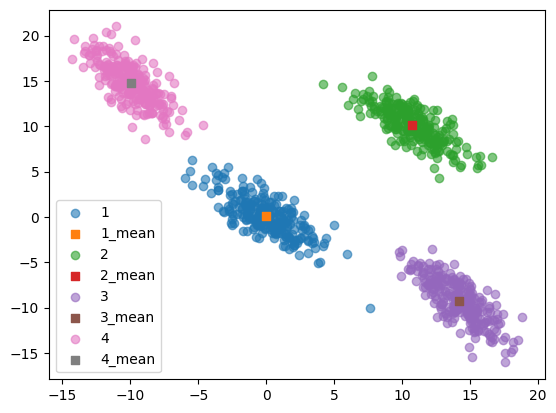

In [88]:
groups = df.groupby('className')

for name, group in groups:
    plt.scatter(group.col1, group.col2, marker='o', label=name, alpha=0.6)
    mean_label = str(name) + '_mean'
    plt.scatter(x = group.col1.mean(), y = group.col2.mean(), marker='s', label = mean_label, alpha=1)
plt.legend()
plt.show()

In [79]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

nn_classifier = KNeighborsClassifier(n_neighbors=1)

X = df.iloc[:,:-1]
y = df.iloc[:, -1]

nn_classifier.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [84]:
y_pred = nn_classifier.predict(df_test.iloc[:,:-1])

In [86]:
#predict the accuracy of the prediction
from sklearn.metrics import accuracy_score
accuracy_score(df_test.iloc[:,-1], y_pred)

1.0

# Decision Boundary Plot

In [92]:
#defining the boundaries of the domain
min1, max1 = df.iloc[:,0].min()-1, df.iloc[:,0].max()+1
min2, max2 = df.iloc[:,1].min()-1, df.iloc[:,1].max()+1

In [101]:
print(min1,max1,min2,max2)

-15.332 19.838 -17.046 21.998


In [125]:
#define all the range

x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

xx, yy = np.meshgrid(x1grid, x2grid)

r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

In [95]:
grid = np.hstack((r1,r2))

In [96]:
yhat = nn_classifier.predict(grid)

c:\Users\91932\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [97]:
zz = yhat.reshape(xx.shape)

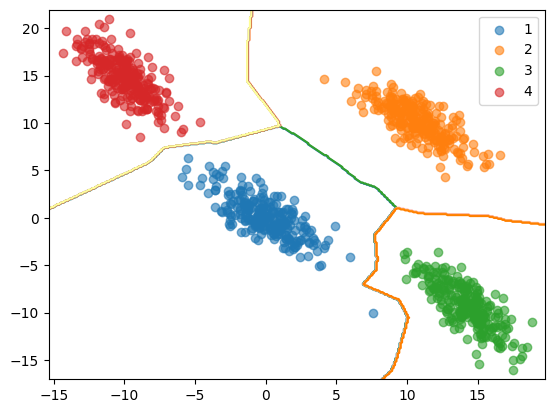

In [100]:
plt.contour(xx, yy, zz, cmap='Paired')
groups = df.groupby('className')
for name, group in groups:
    plt.scatter(group.col1, group.col2, marker='o', label=name, alpha=0.6)
plt.legend()
plt.show()